In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn 

In [2]:
import pandas as pd

# List of file paths for the 7 parts
file_paths = [f'dataset/uwb_dataset_part{i}.csv' for i in range(1, 8)]

# Load each part into a list of DataFrames
data_parts = [pd.read_csv(file_path, header=0) for file_path in file_paths]

In [3]:
# Combine all parts into a single DataFrame
combined_data = pd.concat(data_parts, ignore_index=True)

# Display the combined dataset
print(combined_data.head())
print(f"Combined dataset shape: {combined_data.shape}")

   NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0   0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1   0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2   1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3   1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4   0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   

   MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  \
0      967.0   611.0  ...    279.0    458.0    183.0    158.0    198.0   
1     1133.0   447.0  ...    144.0    334.0    290.0    228.0    187.0   
2      894.0   723.0  ...     32.0    373.0    224.0    174.0    124.0   
3     1127.0  1024.0  ...    252.0    173.0    198.0    160.0    434.0   
4     1744.0   276.0  ...    154.0    209.0    242.0    296.0     87.0   

   CIR1011  CIR1012  CIR1013  CIR1014  CIR1015  
0     87.0    296.0    505.0    307.0      0.0  
1    2

In [4]:
# Check the number of rows in each part
for i, part in enumerate(data_parts, start=1):
    print(f"Part {i} shape: {part.shape}")

# Check the combined dataset
print(f"Combined dataset shape: {combined_data.shape}")
print(combined_data.head())

Part 1 shape: (6000, 1031)
Part 2 shape: (6000, 1031)
Part 3 shape: (6000, 1031)
Part 4 shape: (6000, 1031)
Part 5 shape: (6000, 1031)
Part 6 shape: (6000, 1031)
Part 7 shape: (6000, 1031)
Combined dataset shape: (42000, 1031)
   NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0   0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1   0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2   1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3   1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4   0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   

   MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  \
0      967.0   611.0  ...    279.0    458.0    183.0    158.0    198.0   
1     1133.0   447.0  ...    144.0    334.0    290.0    228.0    187.0   
2      894.0   723.0  ...     32.0    373.0    224.0    174.0    124.0   
3     1127.0  1024.0  ... 

In [5]:
from pandas.api.types import is_numeric_dtype

for col in combined_data.columns:
    if is_numeric_dtype(combined_data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % combined_data[col].mean())
        print('\t Standard deviation = %.2f' % combined_data[col].std())
        print('\t Minimum = %.2f' % combined_data[col].min())
        print('\t Maximum = %.2f' % combined_data[col].max())    

NLOS:
	 Mean = 0.50
	 Standard deviation = 0.50
	 Minimum = 0.00
	 Maximum = 1.00
RANGE:
	 Mean = 3.83
	 Standard deviation = 2.36
	 Minimum = 0.00
	 Maximum = 28.02
FP_IDX:
	 Mean = 745.65
	 Standard deviation = 4.51
	 Minimum = 707.00
	 Maximum = 848.00
FP_AMP1:
	 Mean = 8127.52
	 Standard deviation = 5393.33
	 Minimum = 7.00
	 Maximum = 20572.00
FP_AMP2:
	 Mean = 11425.26
	 Standard deviation = 6235.43
	 Minimum = 63.00
	 Maximum = 20624.00
FP_AMP3:
	 Mean = 9738.11
	 Standard deviation = 5352.31
	 Minimum = 187.00
	 Maximum = 20577.00
STDEV_NOISE:
	 Mean = 72.28
	 Standard deviation = 29.32
	 Minimum = 28.00
	 Maximum = 324.00
CIR_PWR:
	 Mean = 9789.69
	 Standard deviation = 4912.56
	 Minimum = 0.00
	 Maximum = 37208.00
MAX_NOISE:
	 Mean = 1316.10
	 Standard deviation = 582.43
	 Minimum = 310.00
	 Maximum = 5169.00
RXPACC:
	 Mean = 616.27
	 Standard deviation = 306.79
	 Minimum = 128.00
	 Maximum = 1056.00
CH:
	 Mean = 2.00
	 Standard deviation = 0.00
	 Minimum = 2.00
	 Maximum = 2

In [6]:
print('Covariance:')
combined_data.cov(numeric_only=True)

Covariance:


NLOS        RANGE        FP_IDX       FP_AMP1       FP_AMP2  \
NLOS        0.250006     0.538165     -0.714005 -1.206175e+03 -1.636524e+03   
RANGE       0.538165     5.550622     -3.415597 -5.834799e+03 -7.046892e+03   
FP_IDX     -0.714005    -3.415597     20.295240  7.729532e+03  1.244379e+04   
FP_AMP1 -1206.175457 -5834.798989   7729.531981  2.908802e+07  1.997636e+07   
FP_AMP2 -1636.523608 -7046.892031  12443.794652  1.997636e+07  3.888065e+07   
...              ...          ...           ...           ...           ...   
CIR1011    12.271983    46.995894    -34.729113 -8.651383e+04 -1.126574e+05   
CIR1012     8.464511    37.678762     -3.787874 -7.330455e+04 -8.633463e+04   
CIR1013    12.403879    63.280434    -45.681871 -9.626185e+04 -1.324488e+05   
CIR1014    16.712338    63.464442    -52.025942 -1.333263e+05 -1.742815e+05   
CIR1015     6.726255    34.887451     -7.015862 -3.971259e+04 -5.609654e+04   

              FP_AMP3   STDEV_NOISE       CIR_PWR      MAX_NOISE  \
NLOS    -1.376468e+03      2.232529 -9.636162e+02     -57.719470   
RANGE   -5.794516e+03      6.185249 -3.052239e+03    -356.862470   
FP_IDX   1.110685e+04     -5.414667  7.006740e+03     279.601967   
FP_AMP1  1.327151e+07  -9300.505579  9.039003e+06  740879.505683   
FP_AMP2  2.957302e+07 -18238.659535  1.209793e+07  706047.195550   
...               ...           ...           ...            ...   
CIR1011 -8.731253e+04   1635.511374 -5.370396e+04   18651.792471   
CIR1012 -6.094612e+04   3244.957201  1.033126e+03   44950.806654   
CIR1013 -1.060726e+05   1605.790077 -3.954742e+04   16806.978503   
CIR1014 -1.341958e+05   2189.570066 -6.501830e+04   25123.212035   
CIR1015 -4.040326e+04   2248.907655  4.230327e+03   30885.041913   

               RXPACC  ...        CIR1006        CIR1007        CIR1008  \
NLOS     1.120838e+02  ...      15.159420      16.903272      12.858747   
RANGE    4.527116e+02  ...      61.580786      84.584876      59.721541   
FP_IDX  -5.287345e+02  ...     -55.441247     -55.012766     -42.659871   
FP_AMP1 -8.761813e+05  ... -120951.316018 -130463.896232 -101816.912820   
FP_AMP2 -1.190692e+06  ... -166003.815672 -180283.388987 -138964.293955   
...               ...  ...            ...            ...            ...   
CIR1011  1.026738e+04  ...    6242.561973    5661.890988    3884.290258   
CIR1012  7.454810e+03  ...   12382.541458   10524.225968    8302.120716   
CIR1013  1.156841e+04  ...    4399.815804    7590.490314    5582.644294   
CIR1014  1.368896e+04  ...    9691.434486    7187.072668    5708.508142   
CIR1015  6.804717e+03  ...    6405.816030    9419.042686    6540.833714   

               CIR1009        CIR1010        CIR1011       CIR1012  \
NLOS         10.144789       9.229267      12.271983      8.464511   
RANGE        33.740265      44.143874      46.995894     37.678762   
FP_IDX      -47.493976     -26.716123     -34.729113     -3.787874   
FP_AMP1  -78102.604128  -74125.259669  -86513.825342 -73304.550300   
FP_AMP2 -110373.350934 -101232.835203 -112657.448956 -86334.630044   
...                ...            ...            ...           ...   
CIR1011    3238.558283    4346.058442   17907.890346   7807.810213   
CIR1012    4415.743865    8458.665248    7807.810213  31426.261436   
CIR1013    2064.161729    5146.075575    3995.133514   7308.911106   
CIR1014    4498.431251    5501.809234    5830.518108  11703.337994   
CIR1015    2192.443533    6769.297313    4781.057717  10057.300510   

               CIR1013        CIR1014       CIR1015  
NLOS         12.403879      16.712338      6.726255  
RANGE        63.280434      63.464442     34.887451  
FP_IDX      -45.681871     -52.025942     -7.015862  
FP_AMP1  -96261.848446 -133326.315084 -39712.589994  
FP_AMP2 -132448.835544 -174281.495754 -56096.535283  
...                ...            ...           ...  
CIR1011    3995.133514    5830.518108   4781.057717  
CIR1012    7308.911106   11703.337994  10057.300510  
CIR1013   18386.944987

In [7]:
print('Correlation:') 
combined_data.corr(numeric_only=True) #range -1 to +1

Correlation:


NLOS     RANGE    FP_IDX   FP_AMP1   FP_AMP2   FP_AMP3  \
NLOS     1.000000  0.456845 -0.316978 -0.447279 -0.524905 -0.514339   
RANGE    0.456845  1.000000 -0.321809 -0.459196 -0.479689 -0.459521   
FP_IDX  -0.316978 -0.321809  1.000000  0.318126  0.442985  0.460630   
FP_AMP1 -0.447279 -0.459196  0.318126  1.000000  0.594008  0.459750   
FP_AMP2 -0.524905 -0.479689  0.442985  0.594008  1.000000  0.886110   
...           ...       ...       ...       ...       ...       ...   
CIR1011  0.183408  0.149062 -0.057607 -0.119869 -0.135012 -0.121903   
CIR1012  0.095495  0.090215 -0.004743 -0.076670 -0.078104 -0.064233   
CIR1013  0.182948  0.198081 -0.074781 -0.131626 -0.156649 -0.146153   
CIR1014  0.229277  0.184782 -0.079218 -0.169574 -0.191727 -0.171988   
CIR1015  0.092241  0.101537 -0.010678 -0.050489 -0.061687 -0.051761   

         STDEV_NOISE   CIR_PWR  MAX_NOISE    RXPACC  ...   CIR1006   CIR1007  \
NLOS        0.152291 -0.392303  -0.198198  0.730690  ...  0.204009  0.217119   
RANGE       0.089544 -0.263718  -0.260065  0.626349  ...  0.175880  0.230581   
FP_IDX     -0.040994  0.316600   0.106560 -0.382566  ... -0.082809 -0.078428   
FP_AMP1    -0.058817  0.341158   0.235854 -0.529544  ... -0.150902 -0.155359   
FP_AMP2    -0.099765  0.394945   0.194410 -0.622441  ... -0.179141 -0.185691   
...              ...       ...        ...       ...  ...       ...       ...   
CIR1011     0.416852 -0.081691   0.239305  0.250094  ...  0.313894  0.271733   
CIR1012     0.624329  0.001186   0.435355  0.137074  ...  0.470009  0.381282   
CIR1013     0.403910 -0.059368   0.212808  0.278089  ...  0.218334  0.359515   
CIR1014     0.512282 -0.090788   0.295888  0.306080  ...  0.447332  0.316631   
CIR1015     0.525953  0.005905   0.363601  0.152090  ...  0.295557  0.414795   

          CIR1008   CIR1009   CIR1010   CIR1011   CIR1012   CIR1013   CIR1014  \
NLOS     0.194746  0.179485  0.140347  0.183408  0.095495  0.182948  0.229277   
RANGE    0.191958  0.126689  0.142466  0.149062  0.090215  0.198081  0.184782   
FP_IDX  -0.071708 -0.093262 -0.045091 -0.057607 -0.004743 -0.074781 -0.079218   
FP_AMP1 -0.142958 -0.128106 -0.104501 -0.119869 -0.076670 -0.131626 -0.169574   
FP_AMP2 -0.168765 -0.156588 -0.123443 -0.135012 -0.078104 -0.156649 -0.191727   
...           ...       ...       ...       ...       ...       ...       ...   
CIR1011  0.219804  0.214087  0.246935  1.000000  0.329125  0.220168  0.298871   
CIR1012  0.354641  0.220353  0.362799  0.329125  1.000000  0.304055  0.452859   
CIR1013  0.311768  0.134664  0.288557  0.220168  0.304055  1.000000  0.243837   
CIR1014  0.296529  0.272974  0.286956  0.298871  0.452859  0.243837  1.000000   
CIR1015  0.339628  0.132988  0.352921  0.244977  0.389009  0.344579  0.316018   

          CIR1015  
NLOS     0.092241  
RANGE    0.101537  
FP_IDX  -0.010678  
FP_AMP1 -0.050489  
FP_AMP2 -0.061687  
...           ...  
CIR1011  0.244977  
CIR1012  0.389009  
CIR1013  0.344579  
CIR1014  0.316018  
CIR1015  1.000000  

[1031 rows x 1031 columns]

In [8]:
combined_data.describe()

NLOS         RANGE        FP_IDX       FP_AMP1       FP_AMP2  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.000000   
mean       0.500000      3.831519    745.654167   8127.521905  11425.259524   
std        0.500006      2.355976      4.505024   5393.330697   6235.434769   
min        0.000000      0.000000    707.000000      7.000000     63.000000   
25%        0.000000      1.810000    744.000000   3573.750000   5322.750000   
50%        0.500000      3.480000    746.000000   7140.000000  12318.000000   
75%        1.000000      5.420000    748.000000  12273.000000  17310.000000   
max        1.000000     28.020000    848.000000  20572.000000  20624.000000   

            FP_AMP3   STDEV_NOISE       CIR_PWR     MAX_NOISE       RXPACC  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.00000   
mean    9738.106048     72.284571   9789.690214   1316.096524    616.27250   
std     5352.311549     29.318995   4912.556005    582.434989    306.78537   
min      187.000000     28.000000      0.000000    310.000000    128.00000   
25%     4723.000000     56.000000   6727.000000    961.000000    318.00000   
50%    10262.000000     68.000000   9950.500000   1134.000000    513.00000   
75%    14256.000000     80.000000  12443.000000   1488.000000   1024.00000   
max    20577.000000    324.000000  37208.000000   5169.000000   1056.00000   

       ...       CIR1006       CIR1007       CIR1008       CIR1009  \
count  ...  42000.000000  42000.000000  42000.000000  42000.000000   
mean   ...    257.455357    267.230833    249.123929    225.917143   
std    ...    148.613220    155.703171    132.054825    113.041790   
min    ...      1.000000      1.000000      0.000000      0.000000   
25%    ...    161.000000    161.000000    161.000000    150.000000   
50%    ...    233.000000    243.000000    233.000000    217.000000   
75%    ...    313.000000    338.000000    304.000000    275.000000   
max    ...   1593.000000   1497.000000   1172.000000   1169.000000   

            CIR1010       CIR1011       CIR1012       CIR1013       CIR1014  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.000000   
mean     239.445476    240.034286    254.388095    243.190643    253.173595   
std      131.519415    133.820366    177.274537    135.598470    145.780909   
min        0.000000      0.000000      0.000000      2.000000      2.000000   
25%      154.000000    154.000000    155.000000    154.000000    158.000000   
50%      225.000000    227.000000    229.000000    223.000000    230.000000   
75%      288.000000    292.000000    297.000000    295.000000    308.000000   
max     1315.000000   1595.000000   2153.000000   1428.000000   1709.000000   

            CIR1015  
count  42000.000000  
mean      90.203429  
std      145.839730  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      256.000000  
max     1280.000000  

[8 rows x 1031 columns]

NLOS count: 21000
LOS count: 21000


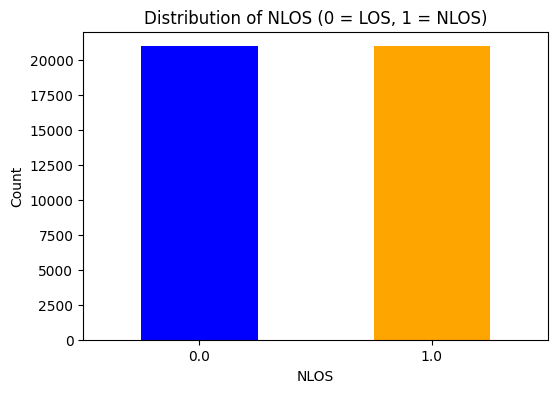

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of NLOS and LOS
nlos_count = combined_data['NLOS'].value_counts()[1]
los_count = combined_data['NLOS'].value_counts()[0]

# Print the counts
print(f'NLOS count: {nlos_count}')
print(f'LOS count: {los_count}')

# Plot the distribution of the target variable (NLOS)
plt.figure(figsize=(6, 4))
combined_data['NLOS'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of NLOS (0 = LOS, 1 = NLOS)')
plt.xlabel('NLOS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


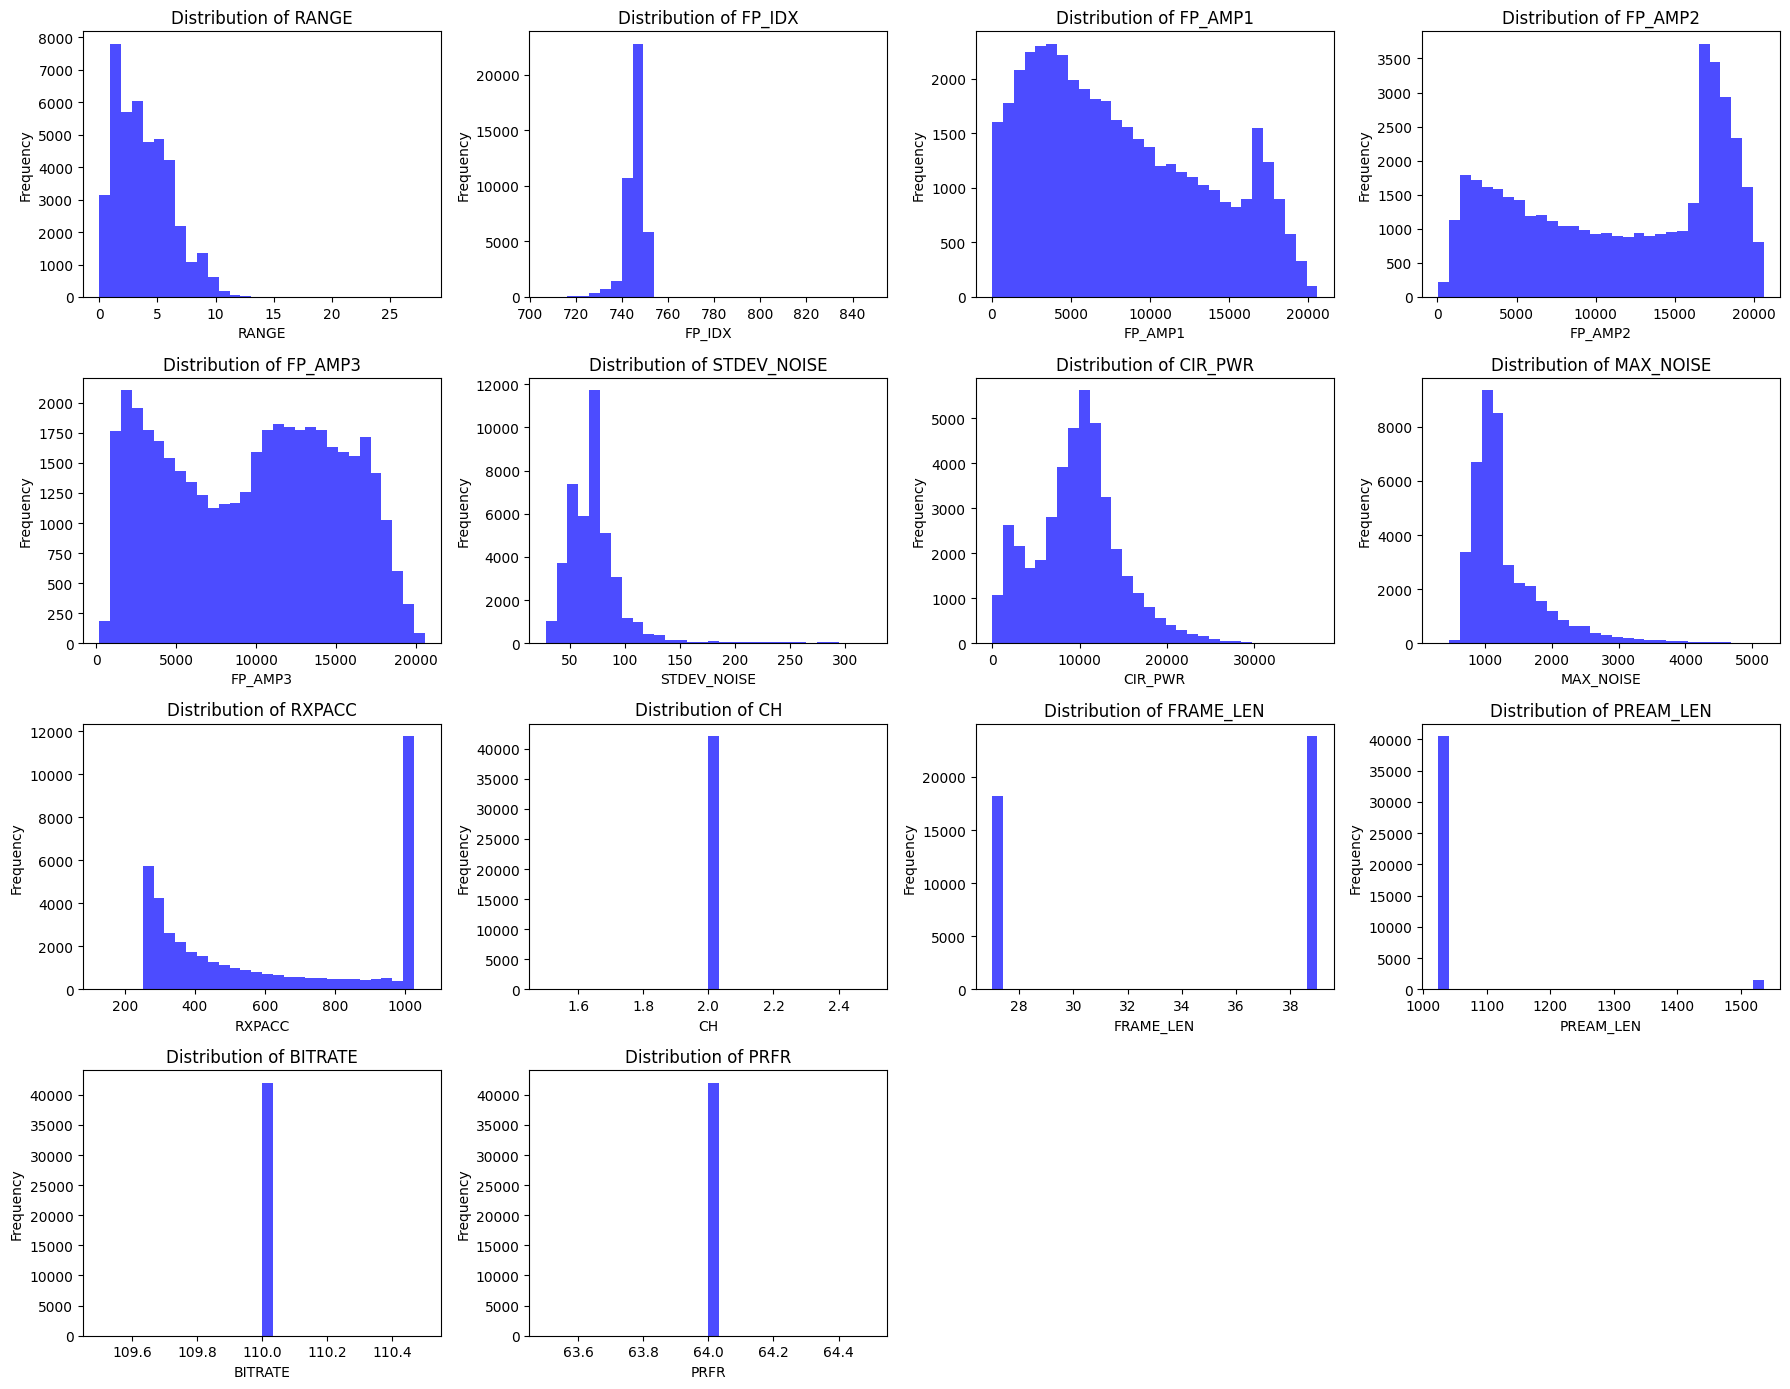

In [10]:
# Define all numerical features
numerical_features = [
    'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
    'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 
    'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'
]

# Set up the plot
plt.figure(figsize=(18, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(combined_data[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for readability
plt.tight_layout()
plt.show()

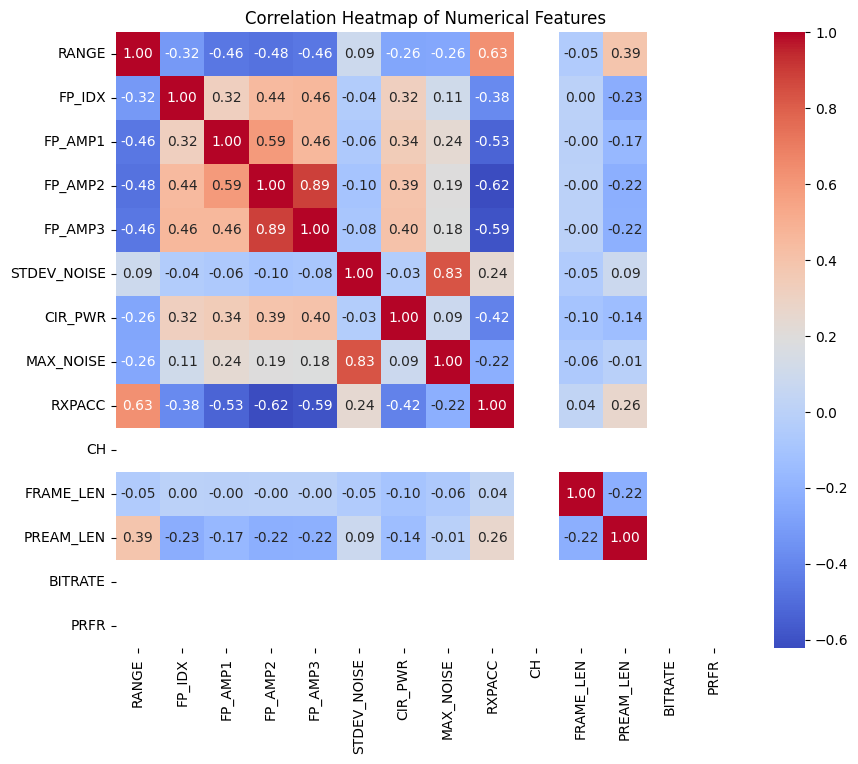

In [11]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = combined_data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

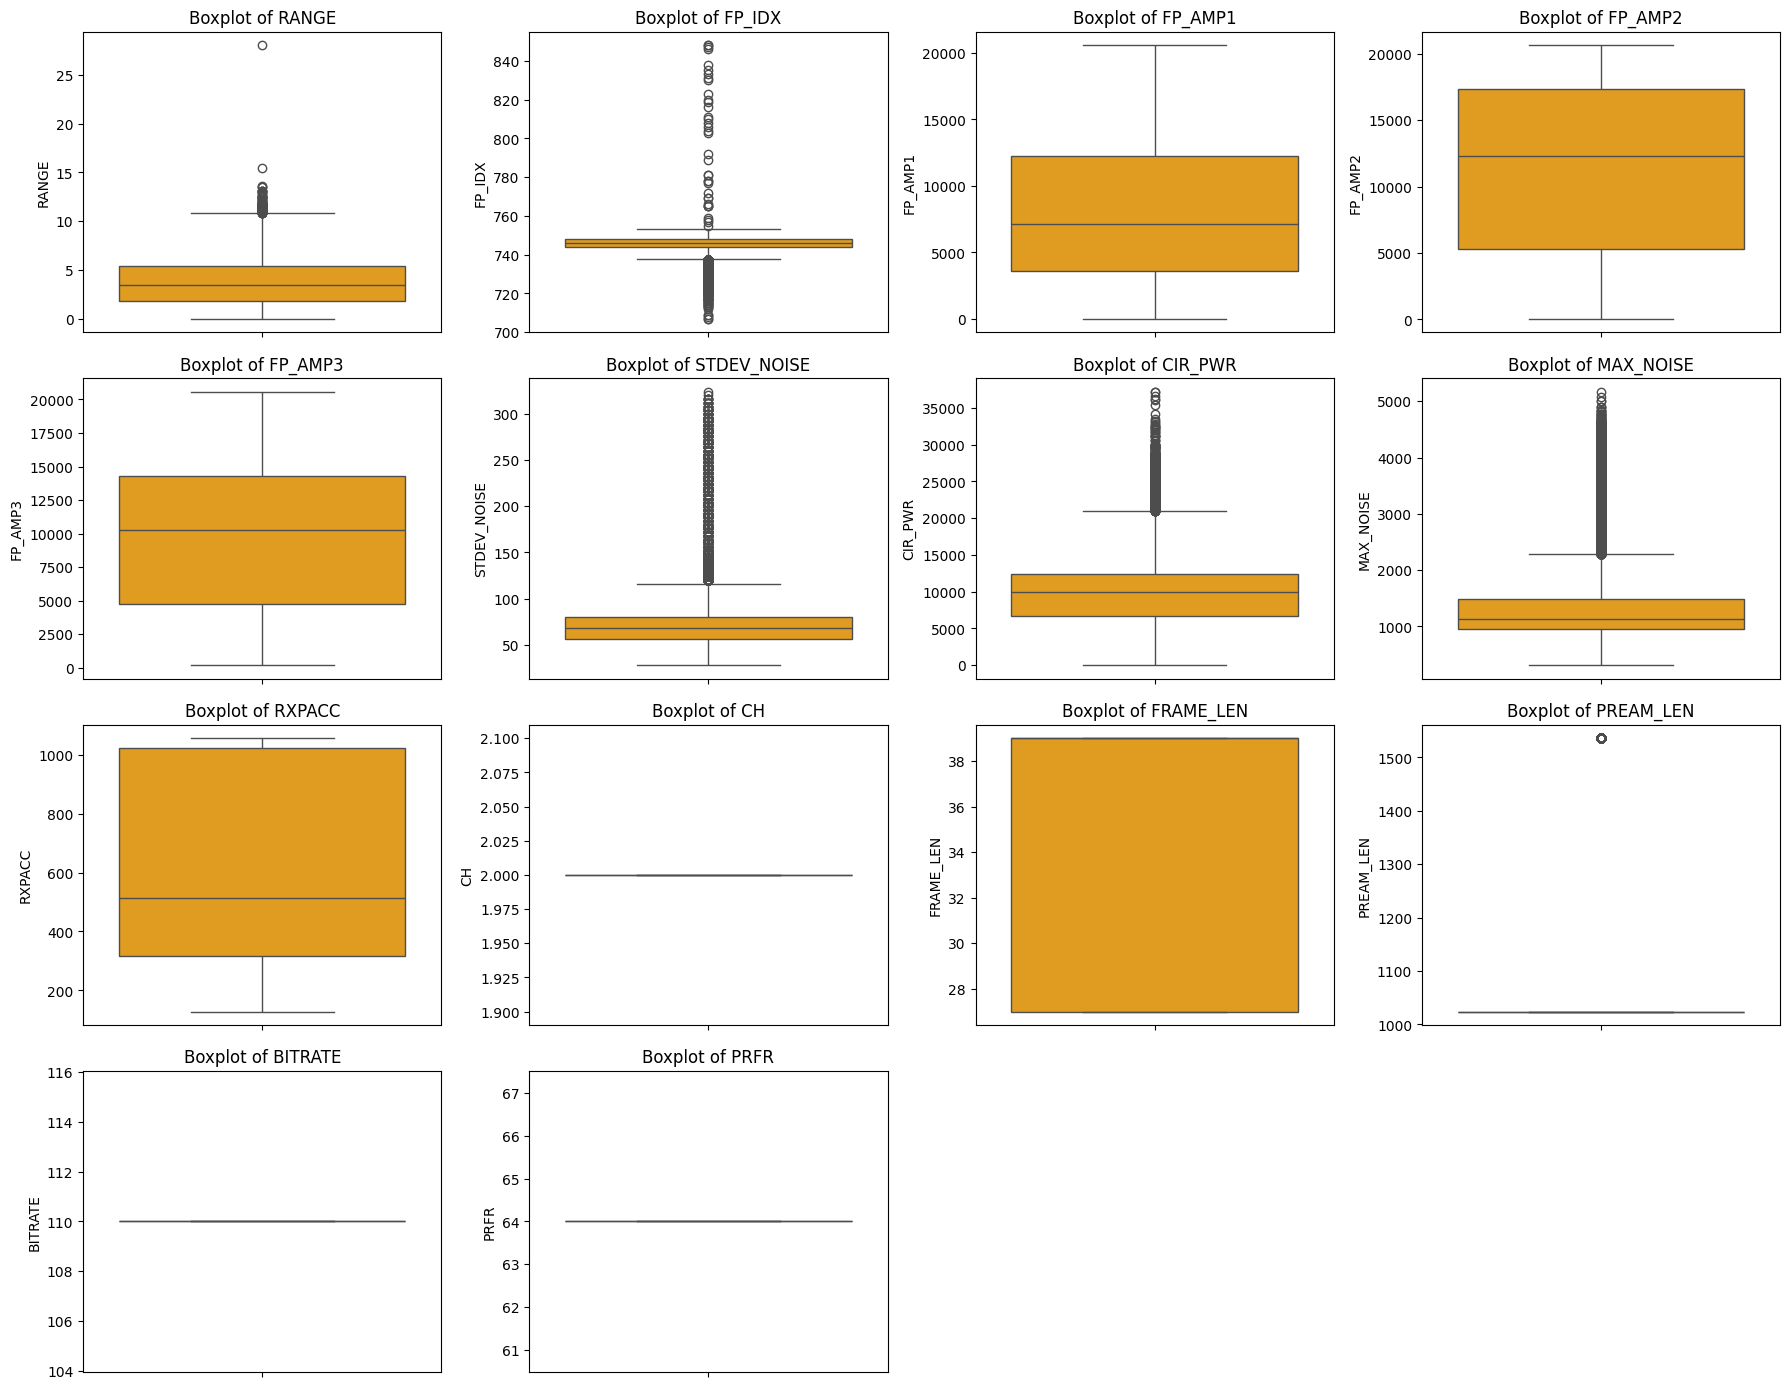

In [12]:
# Plot boxplots for numerical features
# Set up the plot
plt.figure(figsize=(18, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=combined_data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

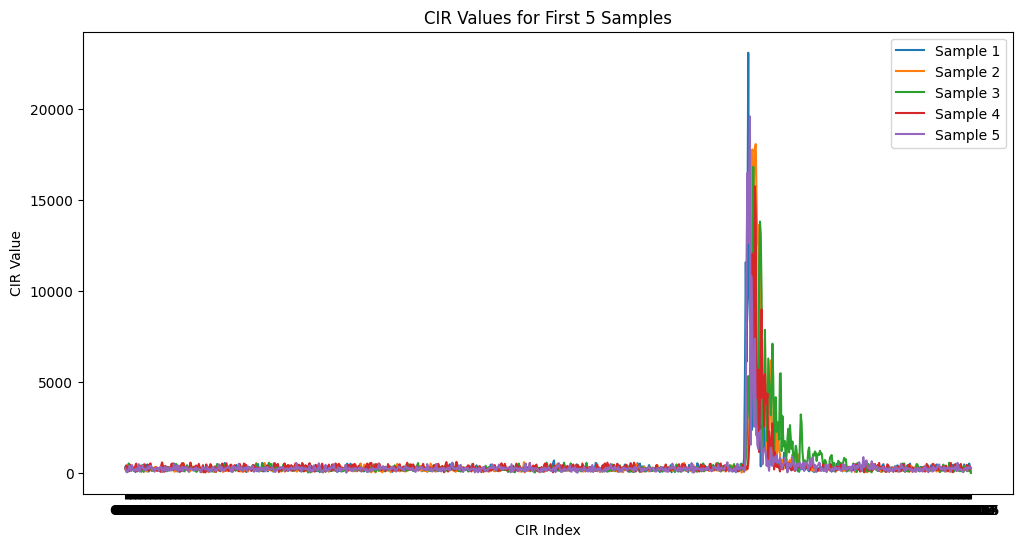

In [13]:
# Plot CIR values for a few samples
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 samples
    plt.plot(combined_data.loc[i, 'CIR1':'CIR1015'], label=f'Sample {i+1}')
plt.title('CIR Values for First 5 Samples')
plt.xlabel('CIR Index')
plt.ylabel('CIR Value')
plt.legend()
plt.show()

In [14]:
# Check for missing values in each column
missing_data = combined_data.isnull().sum()

# Display columns with missing values
if missing_data.sum() > 0:
    print("Missing Data:")
    print(missing_data[missing_data > 0])
else:
    print("No missing data.")

No missing data.


In [15]:
# Check for duplicate rows
duplicate_rows = combined_data.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Display duplicate rows
print("Duplicate Data:")
print(combined_data[duplicate_rows])

Number of duplicate rows: 0
Duplicate Data:
Empty DataFrame
Columns: [NLOS, RANGE, FP_IDX, FP_AMP1, FP_AMP2, FP_AMP3, STDEV_NOISE, CIR_PWR, MAX_NOISE, RXPACC, CH, FRAME_LEN, PREAM_LEN, BITRATE, PRFR, CIR0, CIR1, CIR2, CIR3, CIR4, CIR5, CIR6, CIR7, CIR8, CIR9, CIR10, CIR11, CIR12, CIR13, CIR14, CIR15, CIR16, CIR17, CIR18, CIR19, CIR20, CIR21, CIR22, CIR23, CIR24, CIR25, CIR26, CIR27, CIR28, CIR29, CIR30, CIR31, CIR32, CIR33, CIR34, CIR35, CIR36, CIR37, CIR38, CIR39, CIR40, CIR41, CIR42, CIR43, CIR44, CIR45, CIR46, CIR47, CIR48, CIR49, CIR50, CIR51, CIR52, CIR53, CIR54, CIR55, CIR56, CIR57, CIR58, CIR59, CIR60, CIR61, CIR62, CIR63, CIR64, CIR65, CIR66, CIR67, CIR68, CIR69, CIR70, CIR71, CIR72, CIR73, CIR74, CIR75, CIR76, CIR77, CIR78, CIR79, CIR80, CIR81, CIR82, CIR83, CIR84, ...]
Index: []

[0 rows x 1031 columns]


In [16]:
# Calculate the variance of each column
variances = combined_data.var()

# Identify columns with zero or very low variance
low_variance_columns = variances[variances < 1e-10].index.tolist()

print("Columns with low variance:")
print(low_variance_columns)

Columns with low variance:
['CH', 'BITRATE', 'PRFR']


In [17]:
# Drop columns with low variance
data_cleaned = combined_data.drop(columns=low_variance_columns)

print(f"Shape after dropping low-variance columns: {data_cleaned.shape}")

Shape after dropping low-variance columns: (42000, 1028)


In [19]:
from scipy.stats import zscore
numerical_features = [
    'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
    'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 
    'FRAME_LEN', 'PREAM_LEN'
]

z_scores = data_cleaned[numerical_features].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (abs(z_scores) > 3).any(axis=1)

# Display rows with outliers
print(data_cleaned[outliers])

       NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
6       0.0   0.28   748.0  18991.0  19444.0  18370.0        148.0  13006.0   
27      1.0   8.50   749.0   3454.0   6097.0   4420.0         72.0   4218.0   
41      1.0   2.06   744.0    428.0  17173.0  18074.0        216.0  11102.0   
44      0.0   0.21   744.0  19727.0  20104.0  14811.0        140.0  12437.0   
57      0.0   3.36   749.0  14964.0  10217.0  14568.0         88.0  25028.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41957   1.0   6.33   745.0  15875.0  13231.0   8475.0        284.0   8001.0   
41963   1.0   3.80   731.0    840.0   1814.0   1109.0         72.0   1141.0   
41968   1.0   7.96   728.0   2100.0   1648.0   1033.0         68.0   4678.0   
41992   0.0   0.58   750.0  16893.0  17496.0  13841.0        148.0  10356.0   
41993   1.0   6.21   747.0   2379.0   3561.0   4801.0        220.0   2145.0   

       MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CI

In [20]:
# Remove rows with outliers
data_cleaned = data_cleaned[~outliers]
print(data_cleaned.shape)

(38497, 1028)


In [47]:
# Drop the class attribute (NLOS)
data_without_class = combined_data.drop(columns=['NLOS'])

# Display the dataset without the class attribute
print(data_without_class.head())

   RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  MAX_NOISE  \
0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0      967.0   
1   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0     1133.0   
2   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0      894.0   
3   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0     1127.0   
4   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0     1744.0   

   RXPACC   CH  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  CIR1011  \
0   611.0  2.0  ...    279.0    458.0    183.0    158.0    198.0     87.0   
1   447.0  2.0  ...    144.0    334.0    290.0    228.0    187.0    213.0   
2   723.0  2.0  ...     32.0    373.0    224.0    174.0    124.0    329.0   
3  1024.0  2.0  ...    252.0    173.0    198.0    160.0    434.0    397.0   
4   276.0  2.0  ...    154.0    209.0    242.0    296.0     87.0    178.0   

   CIR1012  CIR1013  CIR1014  CIR1015  
0    296.0    50

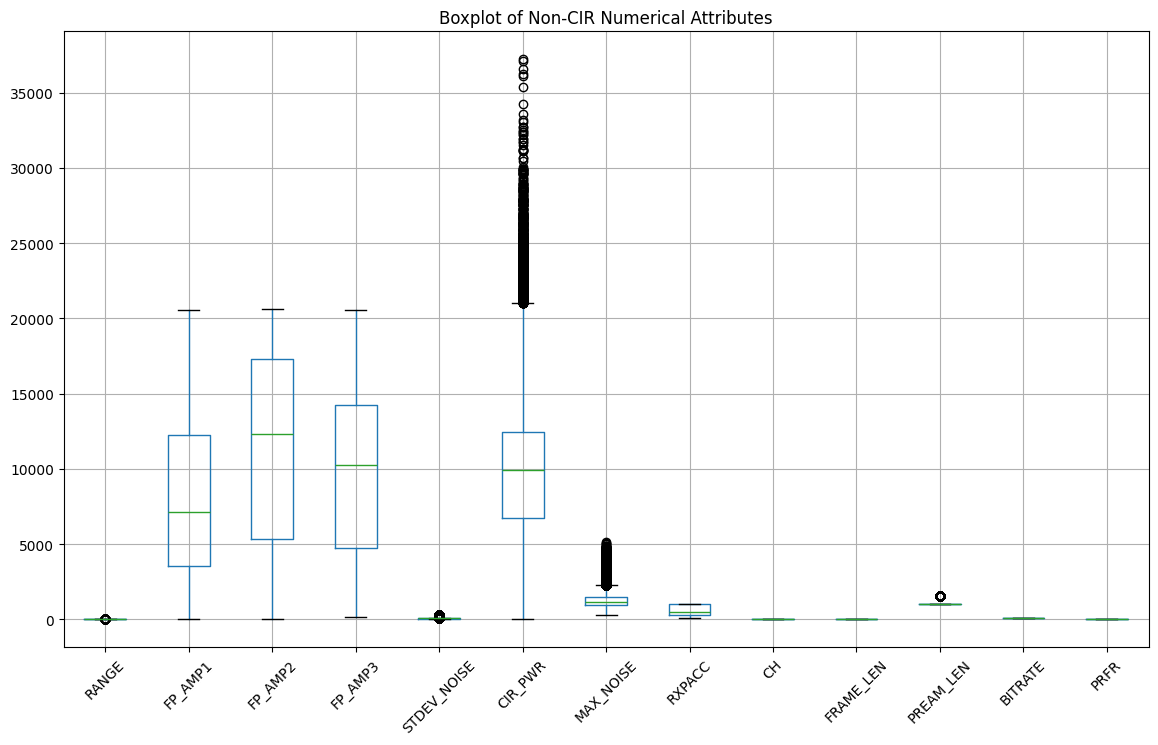

In [48]:
import matplotlib.pyplot as plt

# Select non-CIR numerical columns for visualization
non_cir_columns = ['RANGE', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']

# Plot boxplots for non-CIR numerical columns
plt.figure(figsize=(14, 8))
data_without_class[non_cir_columns].boxplot()
plt.title('Boxplot of Non-CIR Numerical Attributes')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Calculate the variance of each column
variances = data_without_class.var()

# Identify columns with zero or very low variance
low_variance_columns = variances[variances < 1e-10].index.tolist()

print("Columns with low variance:")
print(low_variance_columns)

Columns with low variance:
['CH', 'BITRATE', 'PRFR']


In [51]:
# Drop columns with low variance
data_without_class = data_without_class.drop(columns=low_variance_columns)

print(f"Shape after dropping low-variance columns: {data_without_class.shape}")

Shape after dropping low-variance columns: (42000, 1027)


In [52]:
# 1. Convert data to numeric
data_numeric = data_without_class.select_dtypes(include=['number'])

# 2. Calculate Z-scores
Z = (data_numeric - data_numeric.mean()) / data_numeric.std()

In [53]:
# 3. Identify and remove outliers
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

# Remove rows with any Z-score outside the range [-3, 3]
Z2 = Z.loc[((Z > -3).sum(axis=1) == Z.shape[1]) & ((Z <= 3).sum(axis=1) == Z.shape[1]), :]

print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 42000
Number of rows after discarding outliers = 14851


In [63]:
data_cleaned = data_without_class.loc[Z2.index]
# Display the cleaned dataset
print("Cleaned dataset:")
print(data_cleaned)

Cleaned dataset:
       RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
7       1.23   744.0  14781.0  10399.0  10136.0         40.0   8025.0   
10      1.28   749.0  12079.0  18968.0  16401.0         44.0  12342.0   
12      2.75   745.0   7665.0    908.0   1792.0         60.0   9683.0   
15      2.71   746.0   9067.0  16420.0  16956.0         60.0   8192.0   
16      2.34   744.0  10364.0   7633.0  11581.0         52.0  10456.0   
...      ...     ...      ...      ...      ...          ...      ...   
41987   2.37   748.0   3487.0   5892.0   4150.0         48.0  13219.0   
41989   7.76   747.0   9223.0   1075.0   3358.0         56.0  12753.0   
41994   3.11   747.0  11593.0  17935.0  11757.0         40.0   6787.0   
41996   1.39   745.0   2235.0  15089.0   8796.0         76.0  12559.0   
41999   2.43   747.0   2621.0  10276.0   6284.0         56.0   9116.0   

       MAX_NOISE  RXPACC  FRAME_LEN  ...  CIR1006  CIR1007  CIR1008  CIR1009  \
7         1035.0   272.0  

In [64]:
import pandas as pd
# Aggregate CIR columns (CIR1 to CIR1015)
# Ensure we are working with a copy of the DataFrame
data_cleaned = data_cleaned.copy()

# 1. Aggregation
# Aggregate CIR columns (CIR1 to CIR1015)
cir_columns = [f'CIR{i}' for i in range(1, 1016)]
data_cleaned.loc[:, 'CIR_MEAN'] = data_cleaned[cir_columns].mean(axis=1)
data_cleaned.loc[:, 'CIR_STD'] = data_cleaned[cir_columns].std(axis=1)
data_cleaned.loc[:, 'CIR_MAX'] = data_cleaned[cir_columns].max(axis=1)
data_cleaned.loc[:, 'CIR_MIN'] = data_cleaned[cir_columns].min(axis=1)

# Drop the original CIR columns (optional)
#data_cleaned = data_cleaned.drop(columns=cir_columns)



In [65]:
# 2. Sampling
# Randomly sample 10% of the dataset
sampled_data = data_cleaned.sample(frac=0.1, random_state=42)
print(f"Shape of sampled dataset: {sampled_data.shape}")

Shape of sampled dataset: (1485, 1031)


In [67]:
import pandas as pd
# 3. Discretization
# Discretize the RANGE feature into 5 bins
data_cleaned.loc[:, 'RANGE_BIN'] = pd.cut(data_cleaned['RANGE'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# Discretize the CIR_PWR feature into quartiles
data_cleaned.loc[:, 'CIR_PWR_BIN'] = pd.qcut(data_cleaned['CIR_PWR'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Display the final dataset
print(data_cleaned.head())

    RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  MAX_NOISE  \
7    1.23   744.0  14781.0  10399.0  10136.0         40.0   8025.0     1035.0   
10   1.28   749.0  12079.0  18968.0  16401.0         44.0  12342.0     1187.0   
12   2.75   745.0   7665.0    908.0   1792.0         60.0   9683.0     1421.0   
15   2.71   746.0   9067.0  16420.0  16956.0         60.0   8192.0      897.0   
16   2.34   744.0  10364.0   7633.0  11581.0         52.0  10456.0     1354.0   

    RXPACC  FRAME_LEN  ...  CIR1012  CIR1013  CIR1014  CIR1015    CIR_MEAN  \
7    272.0       27.0  ...    297.0    271.0    295.0    256.0  310.555665   
10   278.0       39.0  ...    151.0     66.0    243.0    256.0  330.098522   
12   282.0       39.0  ...    119.0    240.0    193.0      0.0  345.676847   
15   731.0       39.0  ...     54.0    275.0    262.0      0.0  365.466010   
16   272.0       27.0  ...    208.0    149.0    249.0      0.0  379.923153   

        CIR_STD  CIR_MAX  CIR_MIN  RANGE_BIN

In [46]:
data_cleaned.head()

RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  MAX_NOISE  \
7    1.23   744.0  14781.0  10399.0  10136.0         40.0   8025.0     1035.0   
10   1.28   749.0  12079.0  18968.0  16401.0         44.0  12342.0     1187.0   
12   2.75   745.0   7665.0    908.0   1792.0         60.0   9683.0     1421.0   
15   2.71   746.0   9067.0  16420.0  16956.0         60.0   8192.0      897.0   
16   2.34   744.0  10364.0   7633.0  11581.0         52.0  10456.0     1354.0   

    RXPACC   CH  FRAME_LEN  PREAM_LEN  BITRATE  PRFR   CIR0    CIR_MEAN  \
7    272.0  2.0       27.0     1024.0    110.0  64.0  191.0  310.555665   
10   278.0  2.0       39.0     1024.0    110.0  64.0   62.0  330.098522   
12   282.0  2.0       39.0     1024.0    110.0  64.0  137.0  345.676847   
15   731.0  2.0       39.0     1024.0    110.0  64.0  276.0  365.466010   
16   272.0  2.0       27.0     1024.0    110.0  64.0  101.0  379.923153   

        CIR_STD  CIR_MAX  CIR_MIN  
7   1000.828561  17616.0      4.0  
10  1246.838967  20295.0     11.0  
12  1097.002031  16623.0      0.0  
15  1010.258968  16876.0      0.0  
16  1129.731683  16537.0      0.0

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract CIR columns (CIR1 to CIR1015)
cir_columns = [f'CIR{i}' for i in range(1, 1016)]
cir_data = data[cir_columns]

# Apply PCA
pca = PCA()
pca.fit(cir_data)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Choose the number of components that explain >95% of the variance
n_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() <= 0.95])
print(f"Number of components to retain: {n_components}")

# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
cir_reduced = pca.fit_transform(cir_data)

# Add reduced CIR features back to the dataset
for i in range(n_components):
    data[f'CIR_PC{i+1}'] = cir_reduced[:, i]

# Drop original CIR columns (optional, to save memory)
data.drop(columns=cir_columns, inplace=True)

NameError: name 'data' is not defined